The following is from [this article](https://medium.com/better-programming/shall-we-play-a-game-a7c93963b442) in Medium

Reinforcement learning has even become a critical factor in the fine-tuning of large language models (LLMs), with a mechanism known as reinforcement learning through human feedback (RLHF) putting humans in the loop to act as the reward function itself, manually highlighting more correct responses by the model as part of the improvement process.

Here’s the important things to remember.

- Reinforcement learning is about agents that take actions in environments to maximise rewards.
- Reinforcement learning doesn’t start with a lot of labelled data to train from like other ML methods. Instead, information is learned through exploration of the environment.
- Reinforcement learning can be used by machine learning algorithms to become great at games like Chess and Go, as well as solve real world problems like controlling autonomous vehicles or managing supply chain replenishment.

# The N-Armed Bandit Problem

The ‘N-armed bandit’ problem (so-called because old school slot machines had an arm-like lever you could pull and they were bandits because they took all your money) is actually a classic problem in the world of reinforcement learning.

It’s essentially a bunch of slot machines with variable payouts and an agent that has no visibility of those payouts at the beginning of the process. The aim is to maximise payouts over a series of iterations, and this is exactly the problem we’re going to set up via our Python environment.

In order to work on our n-armed bandit problem we’re going to need some bandits (slots machines). In reinforcement learning terms, what we’re doing here is defining our environment. So let’s set up some ‘bandits’ and define their values randomly within a certain range (but we won’t tell our agent about the range, so they’ll be “going in blind”).

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(111)

In [3]:
num_bandits = 5
t = 2000

In [4]:
q_true = np.random.normal(0, 1, num_bandits)

In [5]:
def get_reward(mean):
    return np.random.normal(mean, 1)

We’ve created 5 bandits, and a ‘t’ of 2000 (essentially we’re going to have 2000 turns at our slot machines to try and maximise the average payout over time).

We’ve also set up a `q_true` array which ensures a random payout or reward for each machine within some boundary. Finally, our `get_reward` function provides the reward for each ‘go’ at a machine, introducing a slight amount of variation for the reward, to make our process more interesting. Let’s plot out the true mean reward for each of our 5 slot machines:

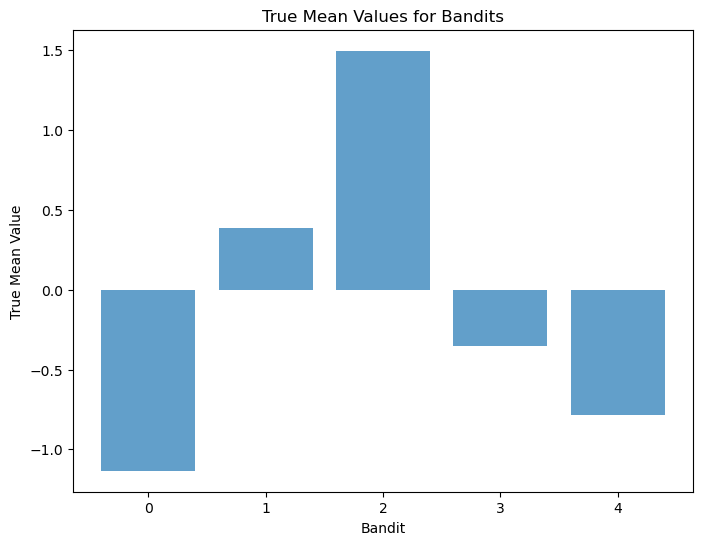

In [6]:
plt.figure(figsize=(8, 6))
plt.bar(range(num_bandits), q_true, align="center", alpha=0.7)
plt.xlabel("Bandit")
plt.ylabel("True Mean Value")
plt.title("True Mean Values for Bandits")
plt.xticks(range(num_bandits))
plt.show()

So we can see some of our bandits actually pay out negative rewards, while #2 can pay out a mean of 1.0. Okay, so to recap we’ve set up our environment, our reward and our reward function for accessing the reward. We’ve also set up our time steps (t = 2000), so we’re nearly ready to go.

# 1. Random Selection

Now it’s time to take some actions! First up, to highlight the difference between using basic reinforcement versus a completely random appraoch, let’s define a function for simply playing bandits at random. This will be our baseline to see how our reinforcement learning methods stack up.

In [7]:
# Use an entirely random selection process as a baseline
def random_selection():
    arm_count = {i: 0 for i in range(num_bandits)}
    q_t = [0] * num_bandits
    step_vs_reward = {}
    average_reward = 0

    for step in range(1, t + 1):
        # pick an action randomly
        picked = np.random.choice(num_bandits)
        arm_count[picked] += 1  # I don't understand how this is used
        reward = get_reward(q_true[picked])
        average_reward += reward

        # update average reward for that action
        q_t[picked] = q_t[picked] + (reward - q_t[picked]) / arm_count[picked]  # I don't understand how this is used
        step_vs_reward[step] = average_reward / step

    return step_vs_reward

Above, we’ve essentially created that random method. At each time step or ‘t’, the method will choose a bandit at random, obtain the reward, update the average and go around again!

In [8]:
random_rewards = random_selection()

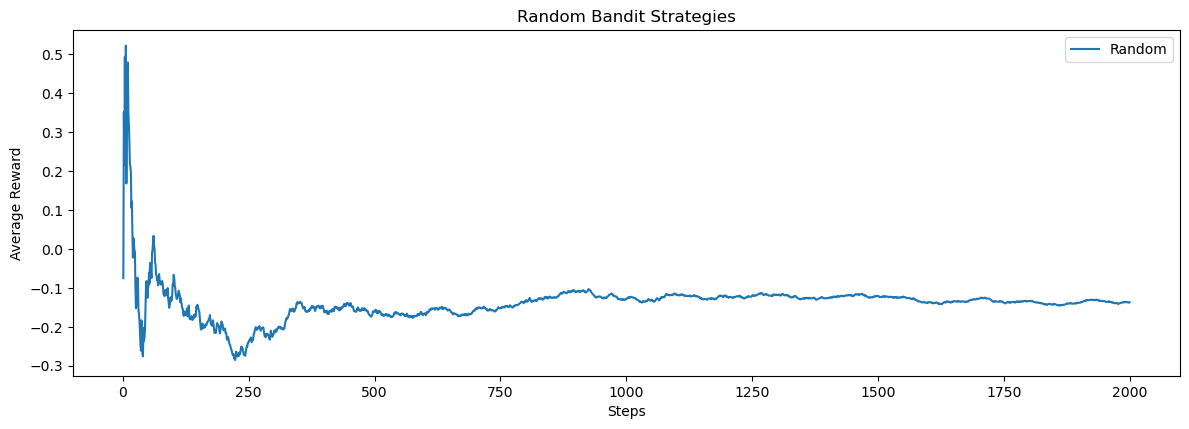

In [9]:
plt.figure(figsize=(12, 8))

# Plot the reward curves
plt.subplot(2, 1, 1)
plt.plot(list(random_rewards.keys()), list(random_rewards.values()), label="Random")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Random Bandit Strategies")
plt.legend()

plt.tight_layout()
plt.show()

Okay, so our completely random process didn’t really seem to get a great score over 2000 turns, with an average reward that’s just barely more than 0. What about if we re-run the experiment but this time put it up against a simple reinforcement process known as ‘greedy’ selection.